## Bird Recognition  Multi-label classification

In [1]:
# import necessary libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### Problem 1. Multi-label classification

In [2]:
# import train and test dataset
df_train = pd.read_csv('csv_result-birds-test.csv')
df_test = pd.read_csv('csv_result-birds-train.csv')

In [3]:
train_data = df_train.copy()
test_data = df_test.copy()

In [4]:
# train_data

### 1a. Binary_relevance_ldc function that should return a binary matrix of assigned labels of size Ntest × c.

In [5]:
def binary_relevance_ldc(train_data, train_labels, test_data):
    N, n = train_data.shape
    Ntest, _ = test_data.shape
    c = train_labels.shape[1]

    ldc = LinearDiscriminantAnalysis()
    assigned_labels = np.zeros((Ntest, c))

    for i in range(c):
        # Prepare binary labels for the current class
        binary_labels = (train_labels[:, i] == 1).astype(int)

        # Train the LDC model for the current class
        ldc.fit(train_data, binary_labels)

        # Predict the binary class labels for the test data
        predictions = ldc.predict(test_data)

        # Assign predicted binary labels to the assigned_labels matrix
        assigned_labels[:, i] = predictions

    return assigned_labels


### 1b. Adaptive_Knn function with k = 10 neighbours and uses same input and output as 1a

In [6]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

def adaptive_knn(train_data, train_labels, test_data):
    N, n = train_data.shape
    Ntest, _ = test_data.shape
    c = train_labels.shape[1]

    knn = KNeighborsClassifier(n_neighbors=10)
    assigned_labels = np.zeros((Ntest, c))

    for i in range(c):
        # Prepare binary labels for the current class
        binary_labels = (train_labels[:, i] == 1).astype(int)

        # Train the k-NN model for the current class
        knn.fit(train_data, binary_labels)

        # Predict the class probabilities for the test data
        probabilities = knn.predict_proba(test_data)

        # Calculate membership counting vector C(x)
        count_vector = np.sum(probabilities * 2 - 1, axis=1)

        # Assign predicted binary labels to the assigned_labels matrix based on the given rule
        assigned_labels[:, i] = (count_vector > 3).astype(int)

    return assigned_labels


### 1c. Importing the bird dataset and comparing the two classifiers using the Hamming Loss

In [7]:
# Prepare the data and labels:
train_labels = train_data.iloc[:, -19:].to_numpy()
train_data = train_data.iloc[:, :-19].to_numpy()

test_labels = test_data.iloc[:, -19:].to_numpy()
test_data = test_data.iloc[:, :-19].to_numpy()

In [8]:
# Apply the binary_relevance_ldc and adaptive_knn functions:
assigned_labels_ldc = binary_relevance_ldc(train_data, train_labels, test_data)
assigned_labels_knn = adaptive_knn(train_data, train_labels, test_data)


In [9]:
# Program the Hamming loss function:
def hamming_loss(true_labels, predicted_labels):
    N, c = true_labels.shape
    loss = np.sum(true_labels != predicted_labels) / (N * c)
    return loss

In [10]:
# Calculate the Hamming loss for both classifiers:
hamming_loss_ldc = hamming_loss(test_labels, assigned_labels_ldc)
hamming_loss_knn = hamming_loss(test_labels, assigned_labels_knn)

In [11]:
# Compare the Hamming loss values:
print("Hamming loss for Binary Relevance with LDC:", hamming_loss_ldc)
print("Hamming loss for Adaptive k-NN:", hamming_loss_knn)

Hamming loss for Binary Relevance with LDC: 0.17538411245505067
Hamming loss for Adaptive k-NN: 0.055737169009480225


Hamming loss is a measure of the classification error rate, where lower values represent better classification performance. In this case:

The Binary Relevance with LDC classifier has a Hamming loss of 0.17538411245505067, which indicates that it incorrectly classifies about 17.54% of the labels.
The Adaptive k-NN classifier has a Hamming loss of 0.055737169009480225, which indicates that it incorrectly classifies about 5.57% of the labels.
Since the Hamming loss for the Adaptive k-NN classifier is lower than the Binary Relevance with LDC classifier, the Adaptive k-NN classifier is more accurate in predicting the labels for this dataset.

### 1d. Finding out the most well recognised and least well recognised bird

#### This is for the Adaptive_Knn model that is more accurate according to the Hamming loss

In [12]:
# Calculate the per-class accuracy for each bird:
def per_class_accuracy(true_labels, predicted_labels):
    c = true_labels.shape[1]
    class_accuracies = []

    for i in range(c):
        true_class = true_labels[:, i]
        predicted_class = predicted_labels[:, i]
        accuracy = np.sum(true_class == predicted_class) / len(true_class)
        class_accuracies.append(accuracy)

    return np.array(class_accuracies)

class_accuracies_knn = per_class_accuracy(test_labels, assigned_labels_knn)


In [13]:
# Find the index of the most well-recognized and least well-recognized birds:
most_well_recognized_knn = np.argmax(class_accuracies_knn)
least_well_recognized_knn = np.argmin(class_accuracies_knn)
print('The most well recognized bird is index',most_well_recognized_knn)
print('The least well recognized bird is index',least_well_recognized_knn)

The most well recognized bird is index 3
The least well recognized bird is index 10


In [14]:
#Extract the label columns
bird_labels = df_train.iloc[:, -19:]

In [15]:
print('The most well recognized bird is the', bird_labels.columns[3], 'bird')
print('The least well recognized bird is the', bird_labels.columns[10], 'bird')

The most well recognized bird is the 'Red-breasted bird
The least well recognized bird is the 'Swainson\'s bird


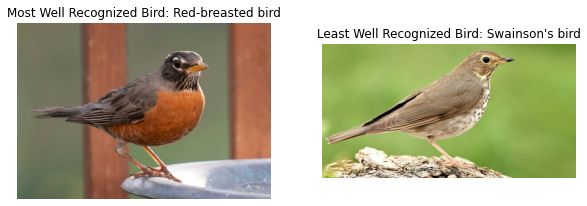

In [16]:
#Visualise the least and most well recognized birds predicted by the Adaptive Knn
import matplotlib.pyplot as plt

most_well_recognized_image = plt.imread("most_well_recognized.jpeg")
least_well_recognized_image = plt.imread("least_well_recognized.jpeg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(most_well_recognized_image, aspect="equal")
axes[0].set_title("Most Well Recognized Bird: Red-breasted bird")
axes[0].axis("off")

axes[1].imshow(least_well_recognized_image, aspect="equal")
axes[1].set_title("Least Well Recognized Bird: Swainson\'s bird")
axes[1].axis("off")

plt.show()


#### This is for the LDC model that is less accurate according to the Hamming loss

In [17]:
# Calculate the per-class accuracy for each bird:
def per_class_accuracy(true_labels, predicted_labels):
    c = true_labels.shape[1]
    class_accuracies = []

    for i in range(c):
        true_class = true_labels[:, i]
        predicted_class = predicted_labels[:, i]
        accuracy = np.sum(true_class == predicted_class) / len(true_class)
        class_accuracies.append(accuracy)

    return np.array(class_accuracies)

class_accuracies_ldc = per_class_accuracy(test_labels, assigned_labels_ldc)


In [18]:
# Calculate the per-class accuracy for each bird using the Binary Relevance LDC predictions:
class_accuracies_ldc = per_class_accuracy(test_labels, assigned_labels_ldc)


In [19]:
# Find the index of the most well-recognized and least well-recognized birds:
most_well_recognized_ldc = np.argmax(class_accuracies_ldc)
least_well_recognized_ldc = np.argmin(class_accuracies_ldc)

print('The most recognized bird is index',most_well_recognized_ldc)
print('The least recognized bird is index',least_well_recognized_ldc)

The most recognized bird is index 16
The least recognized bird is index 6


In [20]:
print('The most well recognized bird is the', bird_labels.columns[16], 'bird')
print('The least well recognized bird is the', bird_labels.columns[6], 'bird')

The most well recognized bird is the 'MacGillivray\'s bird
The least well recognized bird is the 'Hermit bird


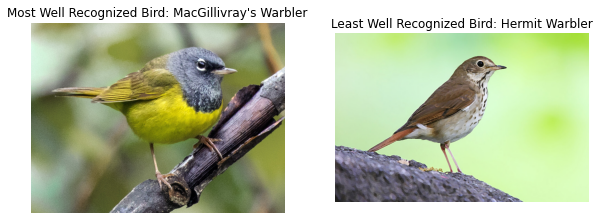

In [21]:
# Visualise the least and most well recognized birds predicted by the LDC
import matplotlib.pyplot as plt

most_well_recognized_image = plt.imread("most_well_recognized2.jpeg")
least_well_recognized_image = plt.imread("least_well_recognized2.jpeg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(most_well_recognized_image)
axes[0].set_title("Most Well Recognized Bird: MacGillivray's Warbler")
axes[0].axis("off")

axes[1].imshow(least_well_recognized_image)
axes[1].set_title("Least Well Recognized Bird: Hermit Warbler")
axes[1].axis("off")

plt.show()


### Problem 2: Streaming Data
    

#### 2a. Generate testing data and Plot it

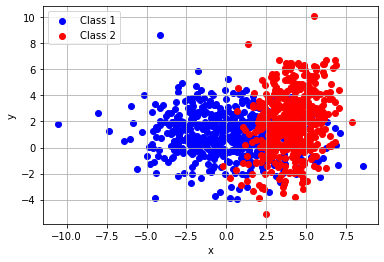

In [22]:
m1 = np.array([0, 1])
Σ1 = np.array([[7, -1], [-1, 3]])
m2 = np.array([4, 2])
Σ2 = np.array([[2, 1], [1, 6]])
N0, N, NN = 5, 100, 1000

# Function to generate data
def generate2Dnormal(N1, N2, m1, m2, Σ1, Σ2):
    c1 = np.random.multivariate_normal(m1, Σ1, N1)
    c2 = np.random.multivariate_normal(m2, Σ2, N2)

    data = np.vstack((c1, c2))
    labels = np.hstack((np.ones(N1), np.ones(N2) * 2))

    rp = np.random.permutation(N1 + N2)
    data = data[rp, :]
    labels = labels[rp]

    return data, labels

# Generate the testing dataset
np.random.seed(110)
testing_data, testing_labels = generate2Dnormal(NN // 2, NN // 2, m1, m2, Σ1, Σ2)

# Plot the data
plt.scatter(testing_data[testing_labels == 1, 0], testing_data[testing_labels == 1, 1], c='blue', label='Class 1')
plt.scatter(testing_data[testing_labels == 2, 0], testing_data[testing_labels == 2, 1], c='red', label='Class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### 2b. Data stream of 300 data points with threshold 0.5

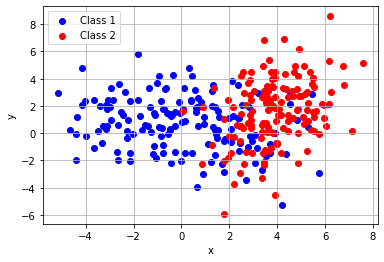

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and distributions
m1 = np.array([0, 1])
Σ1 = np.array([[7, -1], [-1, 3]])
m2 = np.array([4, 2])
Σ2 = np.array([[2, 1], [1, 6]])
N0, N, NN = 5, 100, 1000
num_stream_points = 300


# Function to generate data stream
def generate_data_stream(num_points, m1, m2, Σ1, Σ2):
    data_points = []
    labels = []

    for _ in range(num_points):
        random_value = np.random.uniform()
        if random_value > 0.5:# threshold
            data_point = np.random.multivariate_normal(m1, Σ1, 1)
            label = 1
        else:
            data_point = np.random.multivariate_normal(m2, Σ2, 1)
            label = 2

        data_points.append(data_point[0])
        labels.append(label)

    return np.array(data_points), np.array(labels)

# Generate the data stream
np.random.seed(110)
data_stream, stream_labels = generate_data_stream(num_stream_points, m1, m2, Σ1, Σ2)

# Plot the data stream
plt.scatter(data_stream[stream_labels == 1, 0], data_stream[stream_labels == 1, 1], c='blue', label='Class 1')
plt.scatter(data_stream[stream_labels == 2, 0], data_stream[stream_labels == 2, 1], c='red', label='Class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



#### Nearest mean classifier from Lab7

In [24]:
# Function to test ANMC
def testing_Anmc(means, x, labx):
    d = np.zeros((x.shape[0], means.shape[0]))
    i = 0
    for m in means:  # each row is a class mean
        d[:, i] = sum(np.transpose((x - m) ** 2))  # sq distances
        i += 1  # increment class index
    alab = np.array(list(map((lambda x: np.argmin(x)), d))) + 1
    return np.mean(labx != alab), alab


In [25]:
initial_means = np.array([[1, 2], [-1, -1]])

# Functions defined previously: generate2Dnormal() and generate_data_stream()

# Generate the training, streaming, and testing datasets
np.random.seed(110)
training_data, training_labels = generate2Dnormal(N0, N0, m1, m2, Σ1, Σ2)
data_stream, stream_labels = generate_data_stream(num_stream_points, m1, m2, Σ1, Σ2)
testing_data, testing_labels = generate2Dnormal(NN // 2, NN // 2, m1, m2, Σ1, Σ2)

# Train ANMC on the initial means
mANMC = initial_means.copy()

# Run online learning with ANMC
counts = np.array([0, 0]) # Initialize counts for both classes
accuracy = np.zeros(num_stream_points) # Container for accuracy

class_means_history = [] # Container for class means history

for i, (x, true_label) in enumerate(zip(data_stream, stream_labels)):
    # Update the class mean and count
    class_idx = int(true_label - 1)
    mANMC[class_idx] = (mANMC[class_idx] * counts[class_idx] + x) / (counts[class_idx] + 1)
    counts[class_idx] += 1

    class_means_history.append(mANMC.copy())

    # Calculate accuracy on the testing dataset
    error, _ = testing_Anmc(mANMC, testing_data, testing_labels)
    accuracy[i] = 1 - error



#### Plot the accuracy of the ANMC

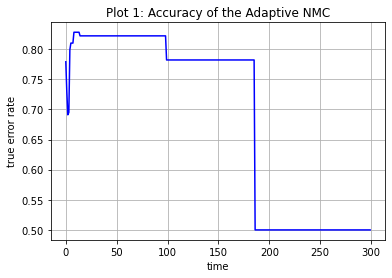

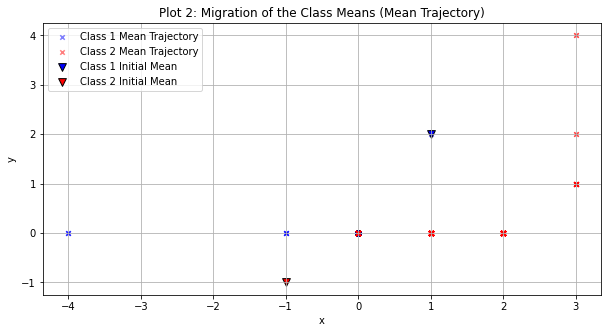

In [26]:
# Plot the accuracy of the ANMC
plt.plot(accuracy, 'b-')
plt.xlabel('time')
plt.ylabel('true error rate')
plt.title("Plot 1: Accuracy of the Adaptive NMC")
plt.grid(True)
plt.show()

# Convert the class_means_history to a numpy array
class_means_history = np.array(class_means_history)

# Plot 2: Migration of the two means (scatter)
plt.figure(figsize=(10, 5))
plt.scatter(class_means_history[:, 0, 0], class_means_history[:, 0, 1], 
            c='blue', marker='x', label='Class 1 Mean Trajectory', alpha=0.5, s=20)
plt.scatter(class_means_history[:, 1, 0], class_means_history[:, 1, 1], 
            c='red', marker='x', label='Class 2 Mean Trajectory', alpha=0.5, s=20)
plt.scatter(initial_means[0, 0], initial_means[0, 1], c='blue', marker='v', 
            label='Class 1 Initial Mean', edgecolors='black', s=60)
plt.scatter(initial_means[1, 0], initial_means[1, 1], c='red', 
            marker='v', label='Class 2 Initial Mean', edgecolors='black', s=60)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title("Plot 2: Migration of the Class Means (Mean Trajectory)")
plt.show()



##### With the streaming points

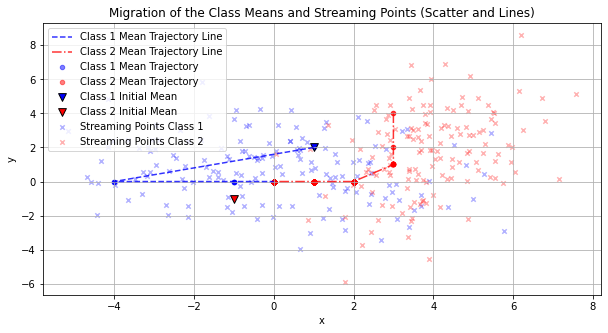

In [27]:
# Convert the class_means_history to a numpy array
class_means_history = np.array(class_means_history)
# Plot 2: Migration of the two means with streaming points
plt.figure(figsize=(10, 5))
plt.plot(class_means_history[:, 0, 0], class_means_history[:, 0, 1],
         'b--', alpha=0.8, label='Class 1 Mean Trajectory Line')
plt.plot(class_means_history[:, 1, 0], class_means_history[:, 1, 1], 'r-.', 
         alpha=0.8, label='Class 2 Mean Trajectory Line')
plt.scatter(class_means_history[:, 0, 0], class_means_history[:, 0, 1], 
            c='blue', marker='o', label='Class 1 Mean Trajectory', alpha=0.5, s=20)
plt.scatter(class_means_history[:, 1, 0], class_means_history[:, 1, 1], 
            c='red', marker='o', label='Class 2 Mean Trajectory', alpha=0.5, s=20)
plt.scatter(initial_means[0, 0], initial_means[0, 1], 
            c='blue', marker='v', label='Class 1 Initial Mean', edgecolors='black', s=60)
plt.scatter(initial_means[1, 0], initial_means[1, 1], 
            c='red', marker='v', label='Class 2 Initial Mean', edgecolors='black', s=60)

# Plot the streaming points
streaming_class1 = data_stream[stream_labels == 1]
streaming_class2 = data_stream[stream_labels == 2]
plt.scatter(streaming_class1[:, 0], streaming_class1[:, 1], 
            c='blue', marker='x', label='Streaming Points Class 1', alpha=0.3, s=20)
plt.scatter(streaming_class2[:, 0], streaming_class2[:, 1], 
            c='red', marker='x', label='Streaming Points Class 2', alpha=0.3, s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title("Migration of the Class Means and Streaming Points (Scatter and Lines)")
plt.show()

#### 2c Calculation of Running Error and plot with the True error rate

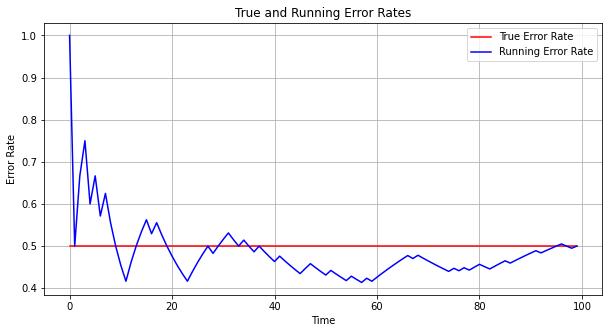

In [28]:
# Run online learning and calculate running error rate
counts = np.array([N0, N0])  # container for counts
true_error = np.zeros(N)  # container for true error
running_error = np.zeros(N)  # container for running error
running_error_count = 0  # count of misclassifications in the streaming data

for i in range(N):  # iterate through the streaming data
    x = data_stream[i]
    tl = int(stream_labels[i] - 1)  # Recover the true label
    
    # Update the class mean and count
    mANMC[tl] = (mANMC[tl] * counts[tl] + x) / (counts[tl] + 1)
    counts[tl] += 1
    
    # Calculate true error rate
    true_error[i], _ = testing_Anmc(mANMC, testing_data, testing_labels)
    
    # Calculate running error rate
    _, alab = testing_Anmc(mANMC, x[np.newaxis, :], stream_labels[i][np.newaxis])
    if alab[0] != stream_labels[i]:
        running_error_count += 1
    running_error[i] = running_error_count / (i + 1)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(true_error, 'r-', label="True Error Rate")
plt.plot(running_error, 'b-', label="Running Error Rate")
plt.xlabel('Time')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.title("True and Running Error Rates")
plt.show()


#### Comments on the curves:


The two curves in the plot represent the true error rate and the running error rate throughout the online learning process.

True Error Rate: This curve is constant and horizontal, indicating that the true error rate remains unchanged throughout the process. In this case, it's at 0.5. The true error rate is calculated using the testing dataset and represents the performance of the model on unseen data. Since it remains constant, it suggests that the overall performance of the model on the testing data doesn't change significantly during the streaming data update process.

Running Error Rate: The running error rate curve shows how the model's performance changes as it processes the streaming data. Initially, the error rate is high, which is expected because the model starts with initial means that might not be very accurate. As more data points are incorporated into the model, the running error rate decreases with some fluctuations till around 0.5 error rate. The fluctuations indicate that the model's performance on individual streaming data points varies, but overall, it converges to a similar error rate as the true error rate. The convergence suggests that the model adapts to the streaming data and improves its performance on the new data points.







